In [134]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from study_library import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
first_analysis = analysis()
first_analysis.n_shapes = 1
score_arrays, df1_arrays = first_analysis.generate_samples()

[0.77843569 0.8159882  0.84257655 0.8838531  0.70477987 0.79743167
 0.76480891 0.71978136 0.85646699 0.84895711]


In [136]:
points = df1_arrays["curve_points"].values[0][:,:2]

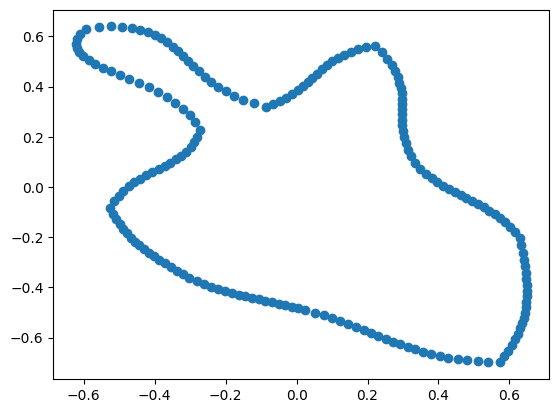

In [137]:
plt.scatter(points[:,0], points[:,1])

In [24]:
import numpy as np
from stl import mesh

# Input: closed 2D shape
points_2d = points

# Extrusion depth
depth = 10.0

# Duplicate top and bottom vertices
bottom = np.hstack((points_2d, np.zeros((len(points_2d), 1))))
top = np.hstack((points_2d, np.full((len(points_2d), 1), depth)))

# Create faces
faces = []
n = len(points_2d)

# Side walls
for i in range(n):
    j = (i + 1) % n
    faces.extend([
        [bottom[i], bottom[j], top[j]],
        [bottom[i], top[j], top[i]]
    ])

# Bottom face
for i in range(1, n - 1):
    faces.append([bottom[0], bottom[i], bottom[i + 1]])

# Top face
for i in range(1, n - 1):
    faces.append([top[0], top[i + 1], top[i]])

# Convert to numpy array
faces = np.array(faces)

# Create mesh
stl_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    stl_mesh.vectors[i] = f

stl_mesh.save('named_cylinder_final_2.stl')


In [17]:
import trimesh
from shapely.geometry import Polygon
import numpy as np

# Load or define your 2D points (must form a closed loop)
points_2d = points
polygon = Polygon(points_2d)

# Create a 3D extruded mesh
extruded = trimesh.creation.extrude_polygon(polygon, height=10.0, engine="triangle")

# Export as STL
extruded.export('shape.stl')


b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x00\x00\x80\xbf\xe0\x18\xc2\xbew\xc3\x1d\xbf\x00\x00\x00\x00R\xfa\xb5\xbe\x1f\x91#\xbf\x00\x00\x00\x00\x99\x9f\xc5\xbe\xa19\'\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbf\xa1*\xa7\xbe-\xfd\x1f\xbf\x00\x00\x00\x00\xe0\x18\xc2\xbew\xc3\x1d\xbf\x00\x00\x00\x00\xda\x84\xbe\xbed\xe1\x14\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x00\x00\x00\x80\x00\x00\x80\xbf\xd6\xe0\xba\xbe\x89\x88\x0c\xbf\x00\x00\x00\x00:#\x99\xbe\x10z\x1c\xbf\x00\x00\x00\x00\xda\x84\xbe\xbed\xe1\x14\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbf\xd6\xe0\xba\xbe\x89\x88\x0c\xbf\x00\x00\x00\x00\x1d

In [ ]:
import numpy as np

def write_facet(f, normal, v1, v2, v3):
    f.write(f"  facet normal {normal[0]} {normal[1]} {normal[2]}\n")
    f.write("    outer loop\n")
    f.write(f"      vertex {v1[0]} {v1[1]} {v1[2]}\n")
    f.write(f"      vertex {v2[0]} {v2[1]} {v2[2]}\n")
    f.write(f"      vertex {v3[0]} {v3[1]} {v3[2]}\n")
    f.write("    endloop\n")
    f.write("  endfacet\n")

def generate_closed_cylinder_ascii_stl(filename, radius=0.001, height=0.01, segments=64):
    z1, z2 = -height / 2, height / 2
    theta = np.linspace(0, 2 * np.pi, segments + 1)

    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    with open(filename, "w") as f:
        f.write("solid cylinder\n")

        # Side walls
        for i in range(segments):
            p1 = [x[i], y[i], z1]
            p2 = [x[i+1], y[i+1], z1]
            p3 = [x[i+1], y[i+1], z2]
            p4 = [x[i], y[i], z2]

            n = np.cross(np.subtract(p2, p1), np.subtract(p3, p1))
            n = n / np.linalg.norm(n)

            write_facet(f, n, p1, p2, p3)
            write_facet(f, n, p1, p3, p4)

        # Bottom cap
        n = [0, 0, -1]
        for i in range(segments):
            p1 = [0, 0, z1]
            p2 = [x[i+1], y[i+1], z1]
            p3 = [x[i], y[i], z1]
            write_facet(f, n, p1, p2, p3)

        # Top cap
        n = [0, 0, 1]
        for i in range(segments):
            p1 = [0, 0, z2]
            p2 = [x[i], y[i], z2]
            p3 = [x[i+1], y[i+1], z2]
            write_facet(f, n, p1, p2, p3)

        f.write("endsolid cylinder\n")

# Usage
generate_closed_cylinder_ascii_stl("flange_2.stl")


In [139]:
import numpy as np

def write_facet(f, normal, v1, v2, v3):
    f.write(f"  facet normal {normal[0]} {normal[1]} {normal[2]}\n")
    f.write("    outer loop\n")
    f.write(f"      vertex {v1[0]} {v1[1]} {v1[2]}\n")
    f.write(f"      vertex {v2[0]} {v2[1]} {v2[2]}\n")
    f.write(f"      vertex {v3[0]} {v3[1]} {v3[2]}\n")
    f.write("    endloop\n")
    f.write("  endfacet\n")

def generate_extruded_shape_stl(filename, pointcloud2d, height=10):
    z1, z2 = -height / 2, height / 2
    xy = np.array(pointcloud2d)
    n_points = len(xy)

    with open(filename, "w") as f:
        f.write("solid extruded_shape\n")

        # Side walls
        for i in range(n_points):
            j = (i + 1) % n_points
            p1 = [*xy[i], z1]
            p2 = [*xy[j], z1]
            p3 = [*xy[j], z2]
            p4 = [*xy[i], z2]

            normal = np.cross(np.subtract(p2, p1), np.subtract(p3, p1))
            normal = normal / np.linalg.norm(normal)

            write_facet(f, normal, p1, p2, p3)
            write_facet(f, normal, p1, p3, p4)

        # Bottom cap
        n = [0, 0, -1]
        center = np.mean(xy, axis=0).tolist() + [z1]
        for i in range(n_points):
            j = (i + 1) % n_points
            write_facet(f, n, center, [*xy[j], z1], [*xy[i], z1])

        # Top cap
        n = [0, 0, 1]
        center = np.mean(xy, axis=0).tolist() + [z2]
        for i in range(n_points):
            j = (i + 1) % n_points
            write_facet(f, n, center, [*xy[i], z2], [*xy[j], z2])

        f.write("endsolid extruded_shape\n")

# Example usage
circle = [(np.cos(t)*0.2, np.sin(t)*0.2) for t in np.linspace(0, 2*np.pi, 64, endpoint=False)]
generate_extruded_shape_stl("flange_from_2d3.stl", points*0.3)


In [26]:
#### let's give her a fair shot

def generate_bezier_curve(p1,       p2,
                          delta1,   delta2,
                          delta_b1, delta_b2,
                          radius1,  radius2,
                          edgy1,    edgy2,
                          n_sampling_pts):

    # Sample the curve if necessary
    if (n_sampling_pts != 0):
        # Create array of control pts for cubic Bezier curve
        # First and last points are given, while the two intermediate
        # points are computed from edge points, angles and radius
        control_pts      = np.zeros((4,2))
        control_pts[0,:] = p1[:]
        control_pts[3,:] = p2[:]

        # Compute baseline intermediate control pts ctrl_p1 and ctrl_p2
        ctrl_p1_base = radius1*delta1
        ctrl_p2_base =-radius2*delta2

        ctrl_p1_edgy = delta_b1
        ctrl_p2_edgy = delta_b2

        control_pts[1,:] = p1 + ctrl_p1_base + edgy1*ctrl_p1_edgy
        control_pts[2,:] = p2 + ctrl_p2_base + edgy2*ctrl_p2_edgy

        # Compute points on the Bezier curve
        curve = sample_bezier_curve(control_pts, n_sampling_pts)

    # Else return just a straight line
    else:
        curve = p1
        curve = np.vstack([curve,p2])

    return curve, control_pts

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bezier_curve_3d(sorted_matrix, num_points=100):
    P0 =sorted_matrix[0,:]
    P1 =sorted_matrix[1,:]
    P2 =sorted_matrix[2,:]
    P3 =sorted_matrix[3,:]
    t = np.linspace(0, 1, num_points)[:, None]
    curve = (1 - t)**3 * P0 + \
            5 * (1 - t)**2 * t * P1 + \
            5 * (1 - t) * t**2 * P2 + \
            t**3 * P3
    return curve

# Define 3D control points
"""
P0 = np.array([0, 0, 0])
P1 = np.array([1, 2, 3])
P2 = np.array([3, 3, 1])
P3 = np.array([4, 6, 7])
"""

curve = bezier_curve_3d(sorted_matrix)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*curve.T, label='Bézier Curve')
ax.legend()
plt.show()


NameError: name 'sorted_matrix' is not defined

[[-0.35956548  0.0517722   0.08761326]
 [-0.0333158   0.35578012  0.14147826]
 [-0.36254359  0.34081952  0.36205586]]
[[-0.71913095  0.1035444   0.61329285]
 [-0.06663159  0.71156024  0.99034784]
 [-0.72508719  0.68163905  2.53439104]]


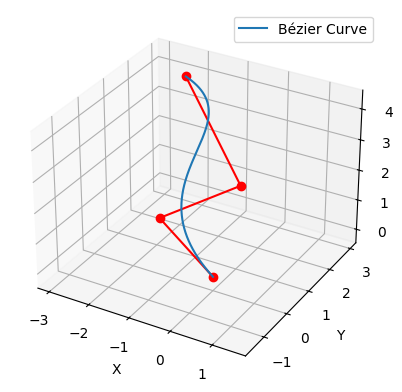

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Generate and sort points
rand_coord_1 = np.random.rand(3, 3)
sorted_matrix = rand_coord_1[np.argsort(rand_coord_1[:, 2])] - np.array([0.5, 0.5, 0])
print(sorted_matrix)
sorted_matrix[:, :-1] = sorted_matrix[:, :-1]*2
sorted_matrix[:, -1] = (sorted_matrix[:, -1])  * 7
print(sorted_matrix)

sorted_matrix = sorted_matrix * 2
sorted_matrix = np.concatenate([np.array([[0,0,0]]), sorted_matrix])
# Extract coordinates
x, y, z = sorted_matrix[:, 0], sorted_matrix[:, 1], sorted_matrix[:, 2]

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, marker='o', color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Uniform axis scaling
max_range = max(np.ptp(x), np.ptp(y), np.ptp(z))
mid_x, mid_y, mid_z = np.mean(x), np.mean(y), np.mean(z)
ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

curve = bezier_curve_3d(sorted_matrix, num_points=1000)

# Plot
ax.plot(*curve.T, label='Bézier Curve')
ax.legend()
plt.show()



In [39]:
distance = np.array([np.linalg.norm(curve[1:] - curve[:-1],axis =1)])
grads = (curve[1:] - curve[:-1])/distance.T


In [76]:
import numpy as np

def rotate_profile_to_vectors(profile_2d, grad_vectors):
    def rotation_matrix(from_vec, to_vec):
        from_vec = from_vec / np.linalg.norm(from_vec)
        to_vec = to_vec / np.linalg.norm(to_vec)
        axis = np.cross(from_vec, to_vec)
        angle = np.arccos(np.clip(np.dot(from_vec, to_vec), -1.0, 1.0))
        if np.allclose(axis, 0):
            return np.eye(3)
        axis = axis / np.linalg.norm(axis)
        K = np.array([[0, -axis[2], axis[1]],
                      [axis[2], 0, -axis[0]],
                      [-axis[1], axis[0], 0]])
        return np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * K @ K

    n_points = profile_2d.shape[0]
    n_grads = grad_vectors.shape[0]
    profile_3d = np.hstack([profile_2d, np.zeros((n_points, 1))])

    rotated = np.empty((n_points, n_grads, 3))
    for i, vec in enumerate(grad_vectors):
        R = rotation_matrix(np.array([0, 0, 1]), vec)
        rotated[:, i, :] = profile_3d @ R.T

    return rotated


In [77]:
cloud = rotate_profile_to_vectors(points, grads[::40,:]) + curve[::40,:]

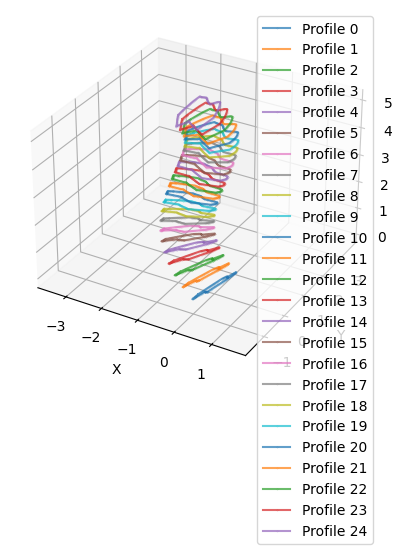

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Assume result is (n_points, n_grads, 3)
def plot_rotated_profiles(rotated_profiles):
    n_points, n_grads, _ = rotated_profiles.shape

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(n_grads):
        ax.plot(
            rotated_profiles[:, i, 0],
            rotated_profiles[:, i, 1],
            rotated_profiles[:, i, 2],
            marker='o', linestyle='-', alpha=0.7, label=f'Profile {i}',markersize = 0.1
        )

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Uniform scaling
    all_pts = rotated_profiles.reshape(-1, 3)
    max_range = np.ptp(all_pts, axis=0).max()
    mid = np.mean(all_pts, axis=0)
    ax.set_xlim(mid[0] - max_range/2, mid[0] + max_range/2)
    ax.set_ylim(mid[1] - max_range/2, mid[1] + max_range/2)
    ax.set_zlim(mid[2] - max_range/2, mid[2] + max_range/2)

    ax.legend()
    plt.show()

# Example use:

plot_rotated_profiles(cloud)


In [79]:
def write_stl_from_profiles(profiles, filename="curved_cylinder.stl"):
    """
    profiles: (n_points, n_profiles, 3)
    """
    n_pts, n_prof, _ = profiles.shape
    with open(filename, "w") as f:
        f.write("solid curved_cylinder\n")

        # Side walls
        for j in range(n_prof - 1):
            for i in range(n_pts):
                i_next = (i + 1) % n_pts
                p1 = profiles[i, j]
                p2 = profiles[i_next, j]
                p3 = profiles[i, j + 1]
                p4 = profiles[i_next, j + 1]
                write_facet(f, p1, p2, p3)
                write_facet(f, p2, p4, p3)

        # Cap start
        center_start = np.mean(profiles[:, 0, :], axis=0)
        for i in range(n_pts):
            i_next = (i + 1) % n_pts
            write_facet(f, profiles[i_next, 0], profiles[i, 0], center_start)

        # Cap end
        center_end = np.mean(profiles[:, -1, :], axis=0)
        for i in range(n_pts):
            i_next = (i + 1) % n_pts
            write_facet(f, profiles[i, -1], profiles[i_next, -1], center_end)

        f.write("endsolid curved_cylinder\n")

        
def write_facet(f, v1, v2, v3):
    normal = np.cross(v2 - v1, v3 - v1)
    if np.linalg.norm(normal) == 0:
        normal = np.array([0, 0, 0])
    else:
        normal = normal / np.linalg.norm(normal)
    f.write(f"  facet normal {normal[0]} {normal[1]} {normal[2]}\n")
    f.write("    outer loop\n")
    for v in [v1, v2, v3]:
        f.write(f"      vertex {v[0]} {v[1]} {v[2]}\n")
    f.write("    endloop\n")
    f.write("  endfacet\n")



In [80]:
write_stl_from_profiles((cloud[:,:] - cloud.mean() + np.array([[0.5,-1,0]]))*0.3)

In [48]:
points.shape

(199, 2)

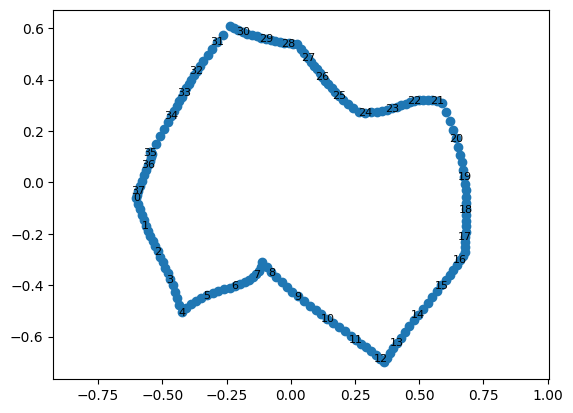

In [81]:
import matplotlib.pyplot as plt

plt.scatter(points[:, 0], points[:, 1])
for i, (x, y) in enumerate(points[::5]):
    plt.text(x, y, str(i), fontsize=8, ha='center', va='center')

plt.axis('equal')
plt.show()
